In [12]:
import numpy as np
import matplotlib.pyplot as plt 
import Qchains

In [13]:
import numpy as np

size = 10

# Generate cube of shape (1000, 3) 
x, y, z = np.meshgrid(np.arange(size), np.arange(size), np.arange(size), indexing='ij')
lattice_points = np.stack((x, y, z), axis=-1).reshape(-1, 3)

In [14]:
dipole_vector_hatx = np.array([1,0,0])
decay_rate_list = []
distances = np.linspace(0, 2, 200) #no need to multipli with π as it is done in Qchains.FindEigenstates
for d in distances[1:]:
    eig_vals, eig_vec_ = Qchains.FindEigenstates(lattice_points, dipole_vector_hatx, d)
    decay_rate = 2 * eig_vals.real
    decay_rate_list.append(decay_rate)

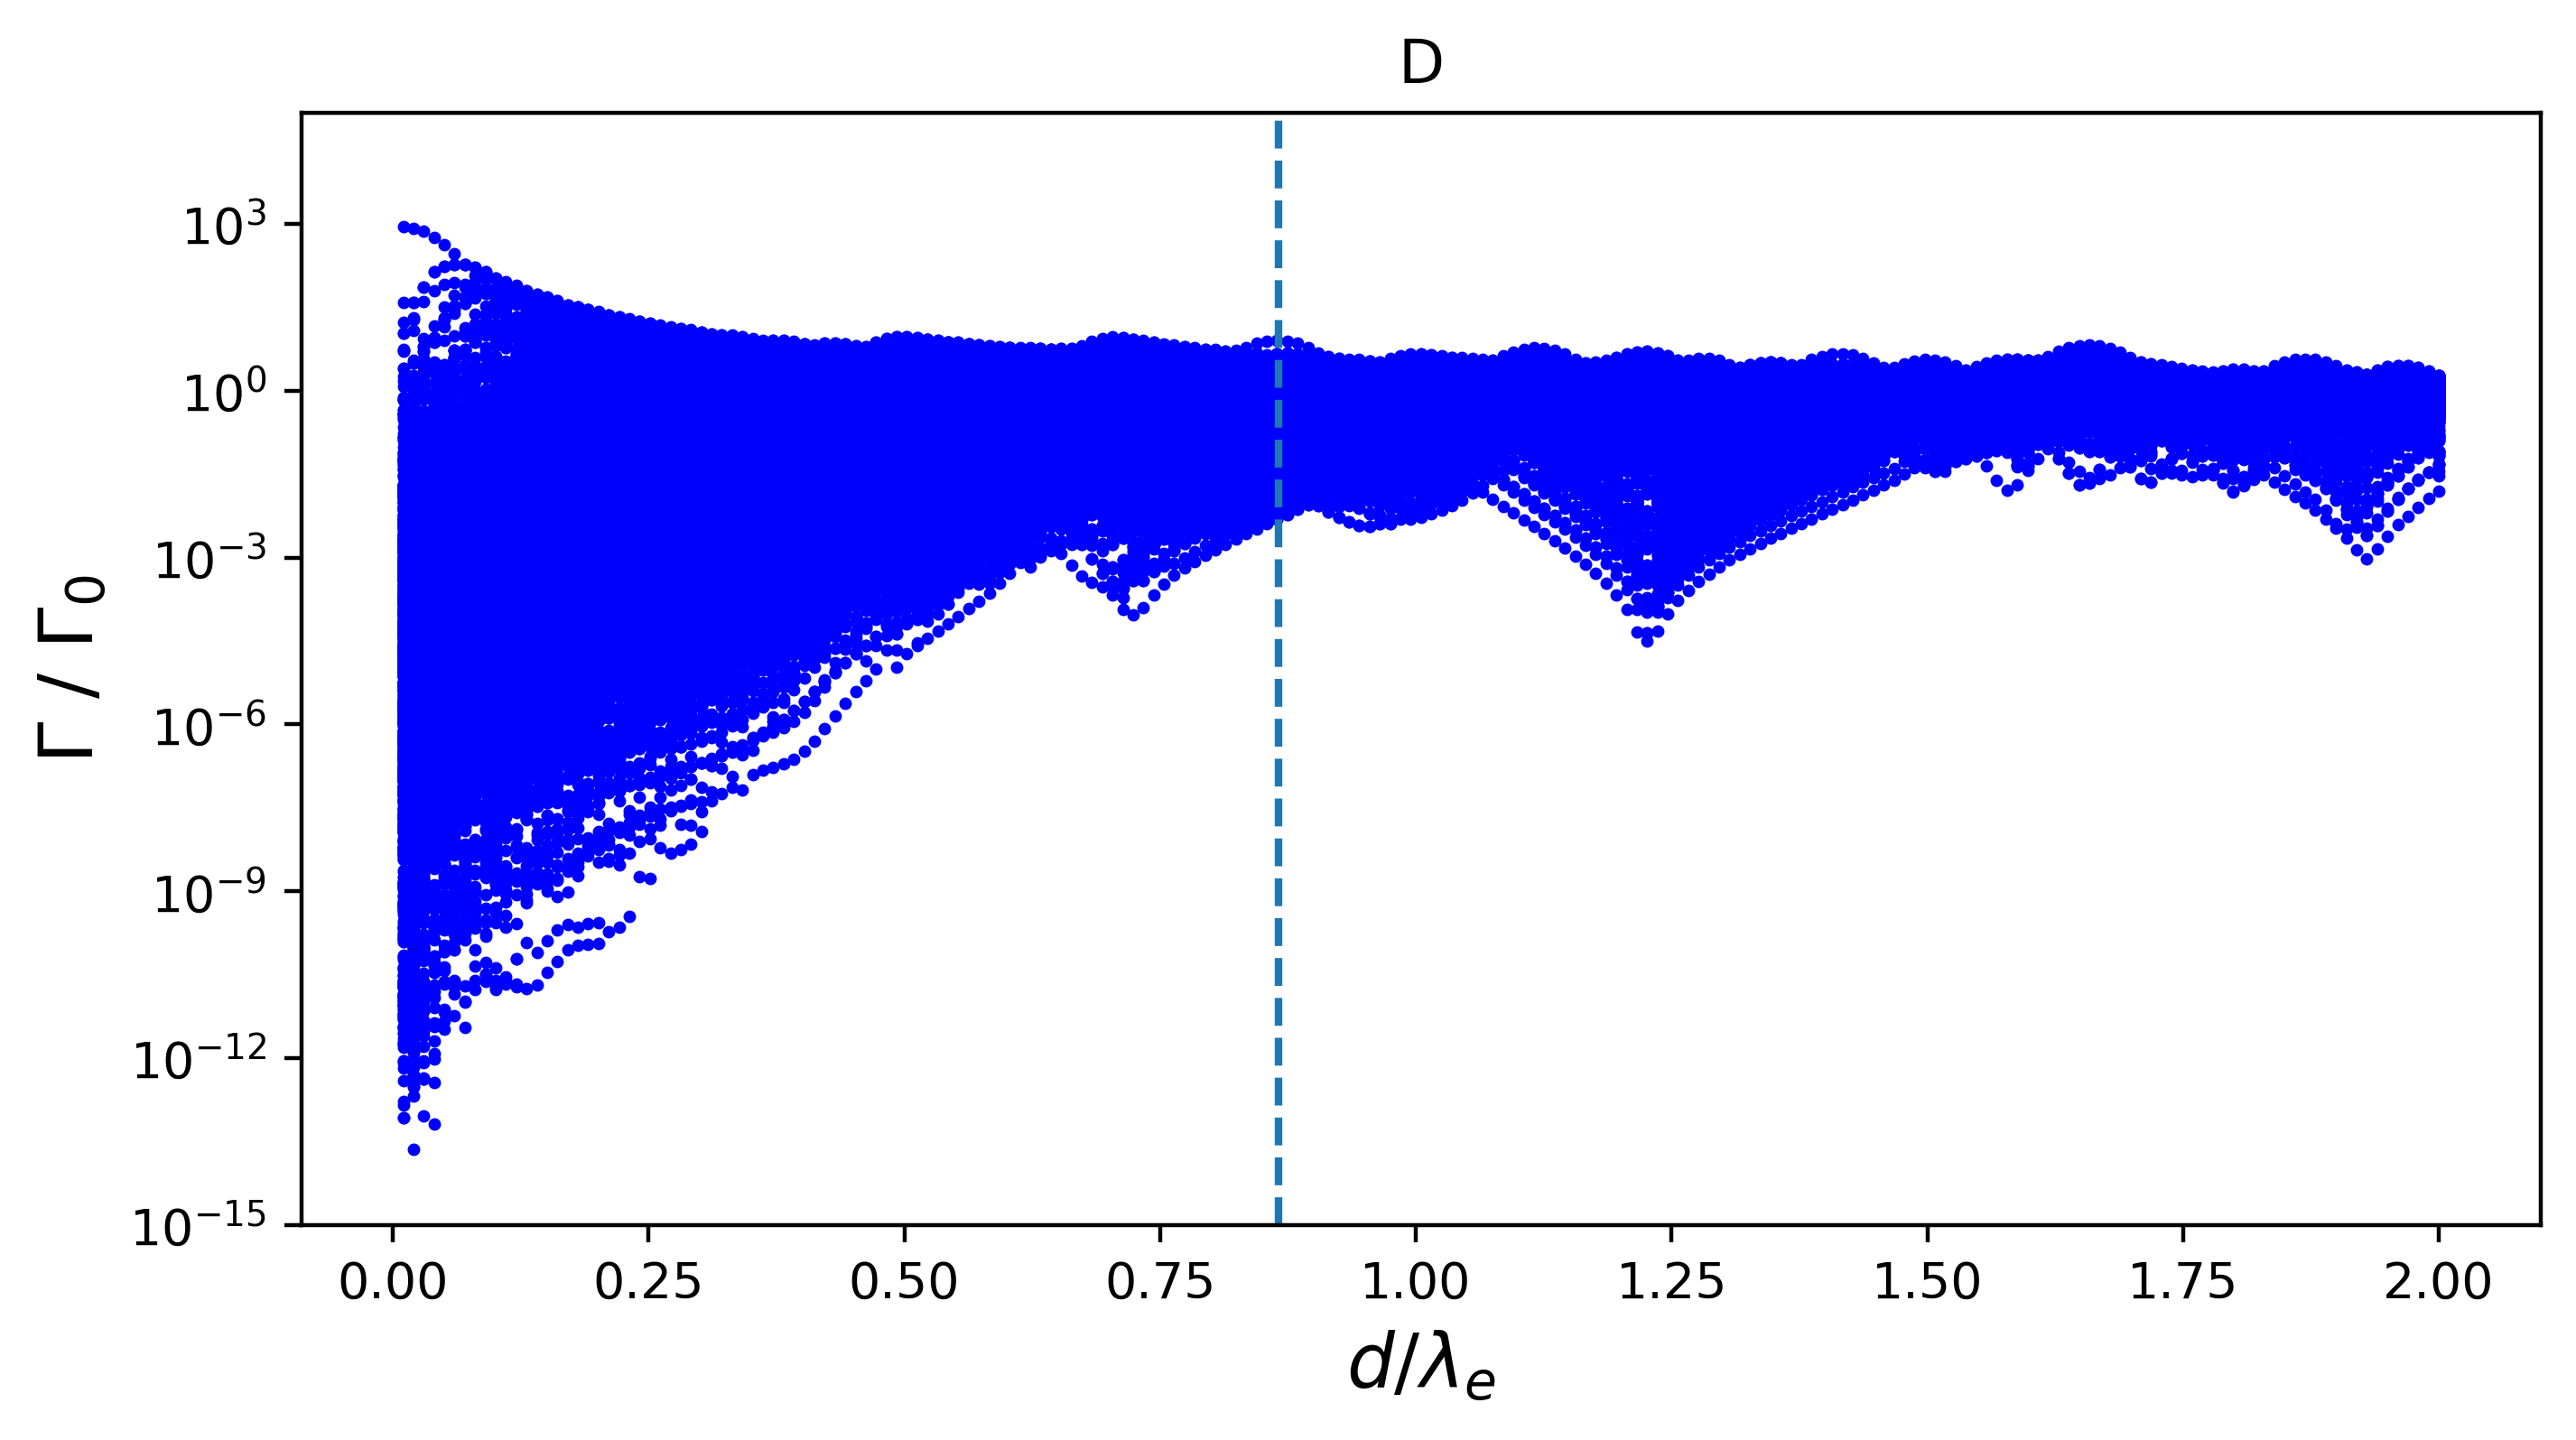

In [23]:
decay_rate_list_reversed = [-p for p in decay_rate_list]
plt.figure(figsize=(8,4), dpi=400)
plt.plot(distances[1:], decay_rate_list_reversed, '.', c = 'blue', markersize=3)
plt.xlabel(r'$d / \lambda_e$', size = 15)
plt.ylabel(r'$\Gamma$ / $\Gamma_0$', size = 15)
plt.axvline(x = np.sqrt(3)/2, ymin = 0, ymax=3, linestyle = '--')
plt.title('D')
plt.yscale('log')
plt.ylim(10**-15, 10**5); 
#plt.savefig("my_plot.png", dpi=300, bbox_inches='tight') 

#### For array

In [24]:
chain_3d_50 = np.zeros((50, 3))  # shape (50, 3), all zeros to start
chain_3d_50[:, 0] = np.arange(50)  # Set x-coordinates

dipole_vector_hatx = np.array([1, 0, 0]) #in x direction
decay_rate_list_50 = []
distances = np.linspace(0, 2, 200) 
for d in distances[1:]:
    eig_vals50, eig_vec_50 = Qchains.FindEigenstates(chain_3d_50, dipole_vector_hatx, d)
    decay_rate = 2 * eig_vals50.real
    decay_rate_list_50.append(decay_rate)

(0.0, 3.0)

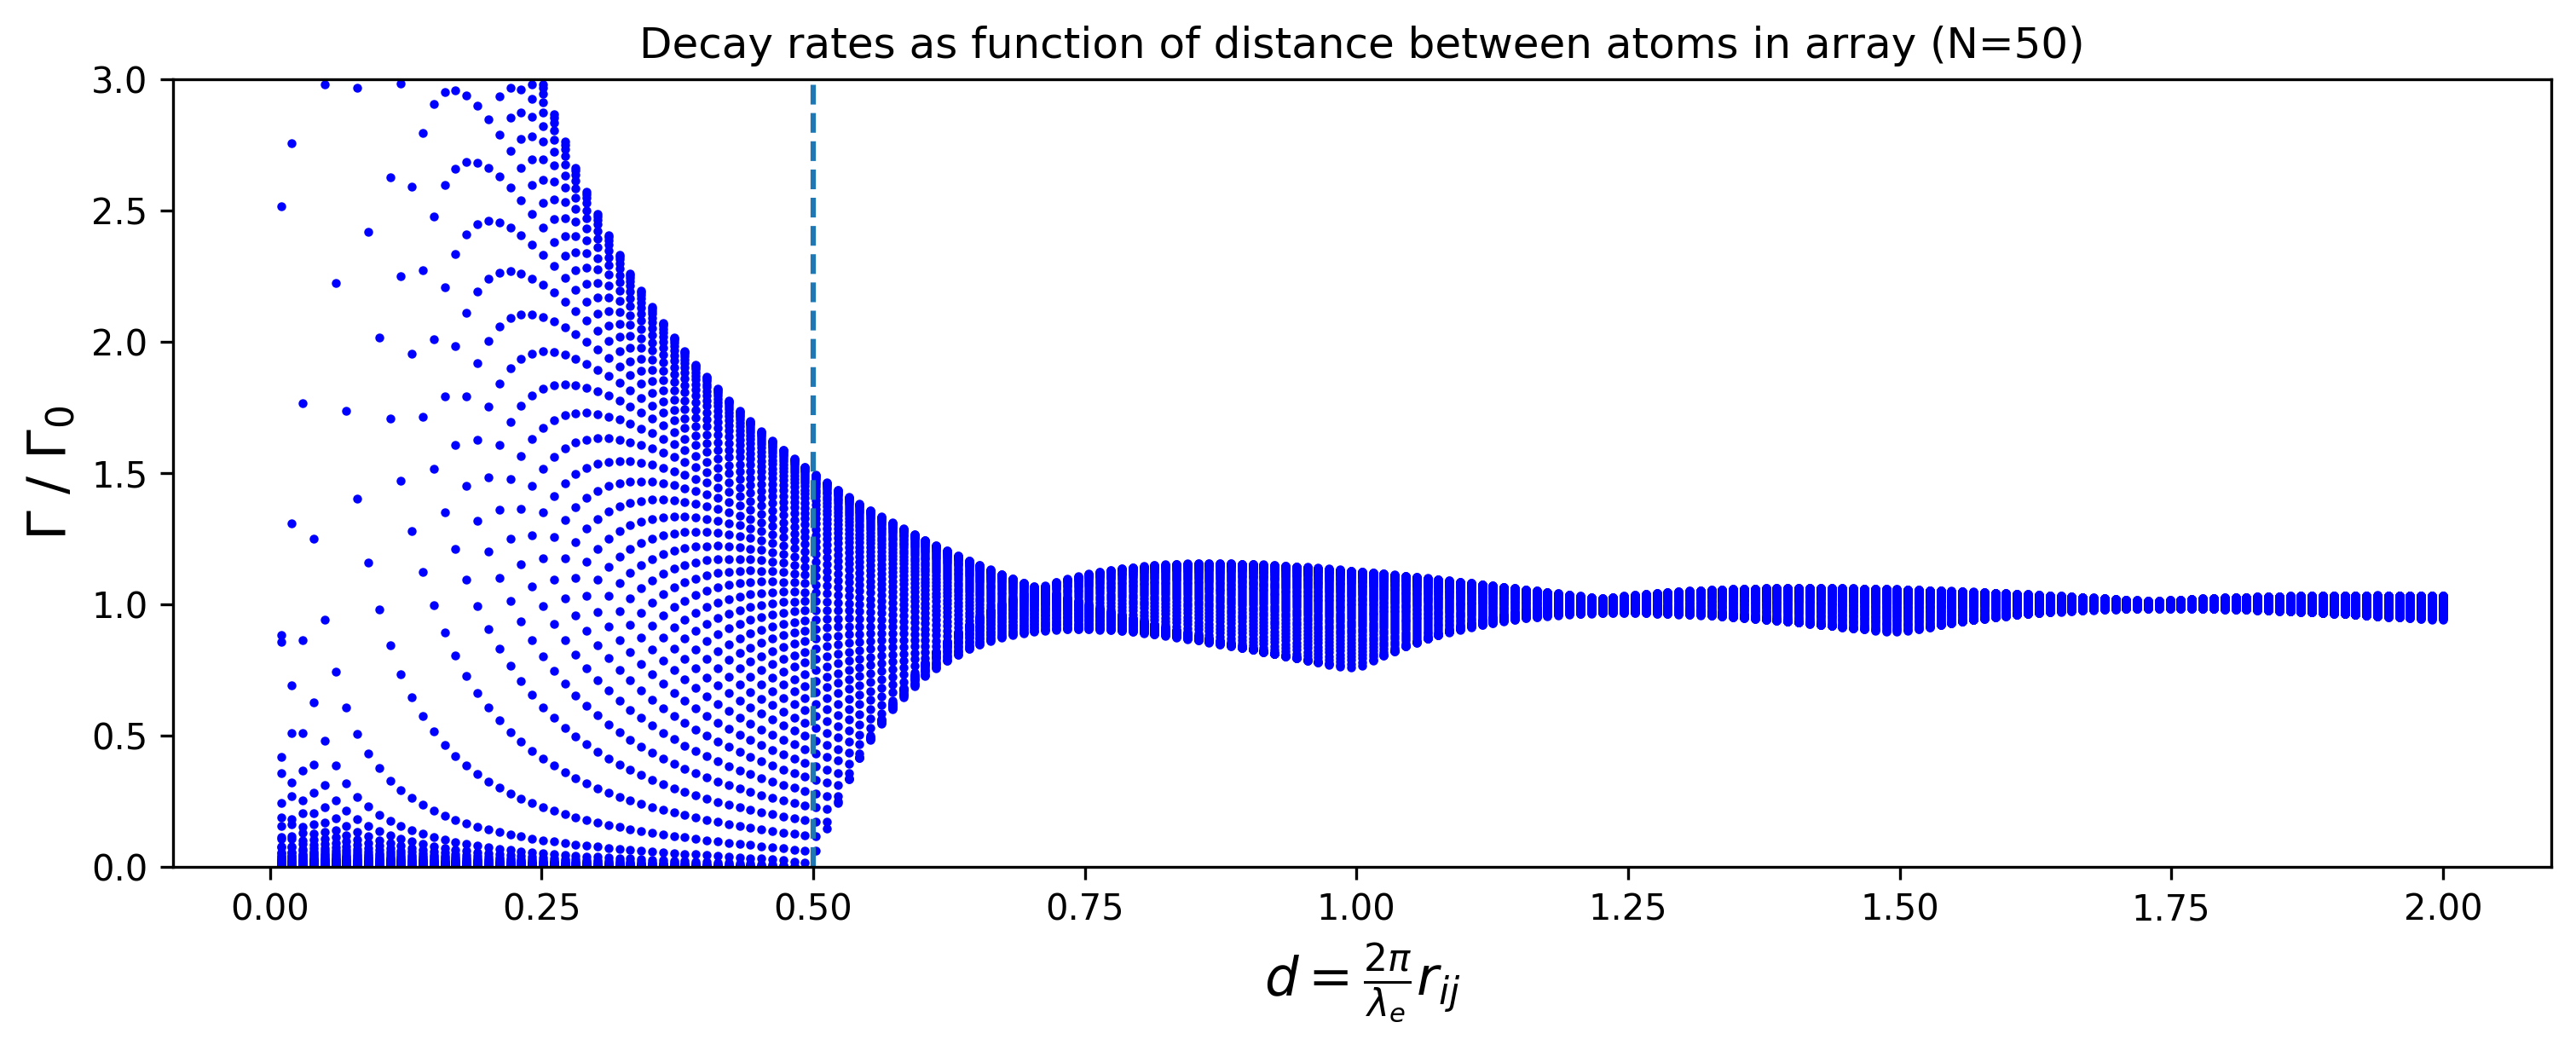

In [27]:
decay_rate_list_50_reversed = [-p for p in decay_rate_list_50]
plt.figure(figsize=(12,4), dpi=300)
plt.plot(distances[1:], decay_rate_list_50_reversed, '.', c = 'blue', markersize=3); #skal gange med pi for x-akse korrekt her. 
plt.xlabel(r'$d=\frac{2 \pi}{\lambda_e} r_{ij}$', size = 15)
plt.ylabel(r'$\Gamma$ / $\Gamma_0$', size = 15)
plt.axvline(x = 1/2, ymin = 0, ymax=3, linestyle = '--')
plt.title('Decay rates as function of distance between atoms in array (N=50)')

plt.ylim(-0, 3)